**Final Project CMSC6950 Fall 2025**

**Mona Hejazi**

 **201996350**

## **Introduction**
#### **Project Aim**
This project investigates a one-year weather dataset for Tehran, with a primary focus on identifying extreme values in temperature and precipitation. Through statistical analysis, the study aims to uncover insights into Tehran’s climatic trends and extreme weather events over the observed period.

#### **Background**
Weather data serves as a crucial resource for understanding climatic patterns, forecasting, and decision-making in various sectors. By analyzing meteorological parameters such as temperature, precipitation, and wind patterns, we can identify anomalies, explore correlations, and assess their potential impacts. This project explores the statistical distribution of key weather variables for Tehran, delving into both summary statistics and outlier detection.

#### **Dataset Overview**:
The dataset contains daily weather records for Tehran from **October 1, 2023**, to **September 30, 2024**. It comprises 366 entries, representing each day of the year, and includes 11 meteorological variables:

- `date`: Date of the weather record
- `tavg`: Average temperature (°C)
- `tmin`: Minimum temperature (°C)
- `tmax`: Maximum temperature (°C)
- `prcp`: Precipitation (mm)
- `snow`: Snowfall (cm) — with limited data
- `wdir`: Wind direction (degrees)
- `wspd`: Wind speed (m/s)
- `wpgt`: Wind gust (m/s) — with missing data
- `pres`: Atmospheric pressure (hPa)
- `tsun`: Sunshine duration (hours) — missing data

#### **Objectives**
The project’s primary objectives include:
1) Analyzing daily averages, minimum and maximum temperatures, and precipitation trends across the year.
2) Identifying and visualizing extreme values in temperature and precipitation using statistical methods.
3) Exploring correlations between key variables to understand weather dynamics in Tehran.


#### **Hypothesis**
1) The average temperature, wind speed, and precipitation do not follow a normal distribution.
2) There is no linear correlation between average temperature and precipitation.
3) A linear correlation exists between wind speed and precipitation.
4) Removing outliers enhances the reliability of statistical analysis.

#### **Source** :
 https://meteostat.net/en/place/ir/tehran?s=40754&t=2023-10-01/2024-09-30



#### **Methodology**
**Data Processing and Handling Missing Values**

The project began with a detailed inspection of the dataset to evaluate its structure and identify issues such as missing values. Several columns, including snow, wpgt, and tsun, contained substantial gaps in data. To maintain the reliability of the analysis, these variables were excluded from further investigation.

**Summary Statistics**

Key weather variables—tavg (average temperature), tmin (minimum temperature), tmax (maximum temperature), wspd (wind speed), pres (atmospheric pressure), and prcp (precipitation)—were analyzed to calculate summary statistics. Metrics such as mean, standard deviation, minimum, maximum, and interquartile range (25th, 50th, and 75th percentiles) were computed. These measures provided a foundational understanding of the dataset, highlighting central tendencies, variability, and potential anomalies.

**Extreme Temperature Analysis**

**Workflow Overview**

A Python-based analytical pipeline was developed to examine Tehran’s annual weather trends. The workflow included importing and preprocessing the dataset from an Excel file. The date column was converted to a datetime format and set as the index to enable time-series operations. This preprocessing step facilitated the structured analysis of weather data across time.

**Identifying and Highlighting Extreme Values**

To detect significant deviations in Tehran’s weather patterns:

1.	A custom function identified the highest and lowest temperatures along with their corresponding dates.

2.	These values were critical for understanding extreme weather conditions in the dataset.

**Visualization of Temperature Trends**

Visual representations were created to communicate findings effectively:

•	**Daily Trends:** A line plot illustrated daily minimum, maximum, and average temperatures, with shaded areas denoting the range between the minimum and maximum.

•	**Extreme Highlights:** Extreme temperature values were marked and annotated to emphasize their significance.

•	**Annual Mean Temperature:** A horizontal reference line displayed the yearly average temperature for context.

This systematic approach provided insights into both extreme events and broader temperature trends in Tehran.


Plot saved as E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_extreme_Plot.pdf


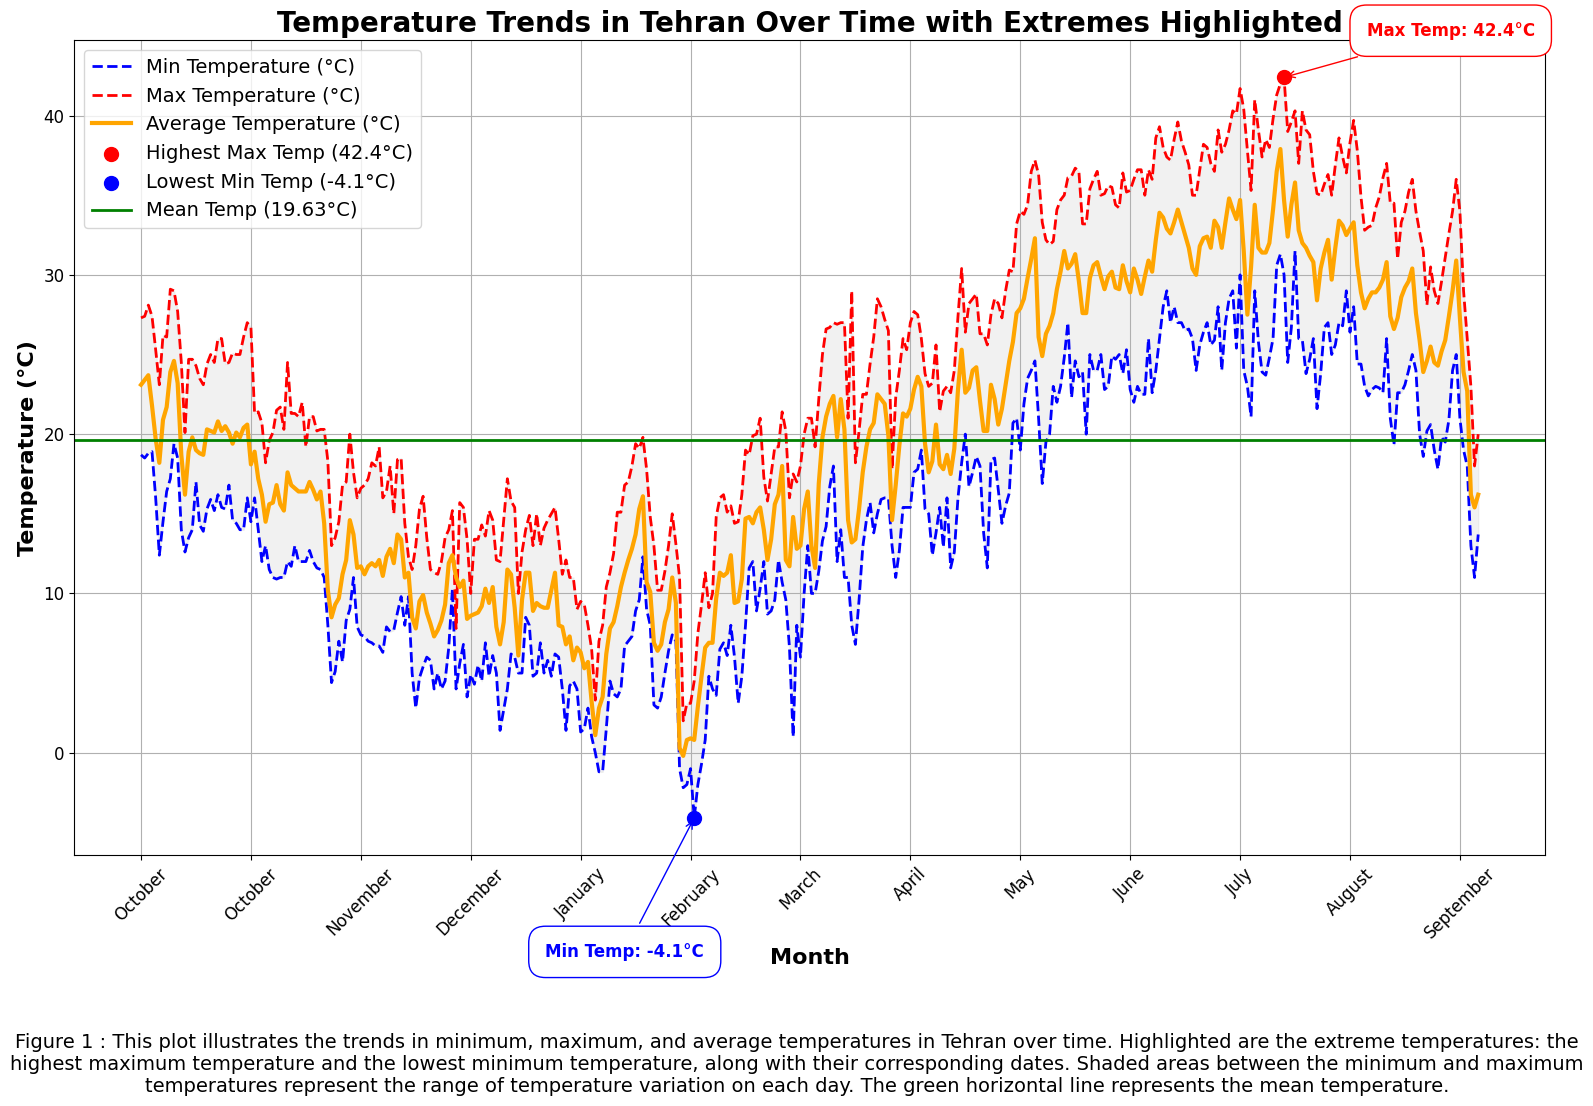

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    
    Args:
        file_path (str): Path to the Excel file.
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def find_extreme_values(data):
    """
    Find the extreme temperatures and their corresponding dates.
    
    Args:
        data (pd.DataFrame): DataFrame with temperature data.
    
    Returns:
        tuple: (max_temp, max_temp_date, min_temp, min_temp_date)
    """
    max_temp = data['tmax'].max()
    max_temp_date = data['tmax'].idxmax()
    min_temp = data['tmin'].min()
    min_temp_date = data['tmin'].idxmin()
    return max_temp, max_temp_date, min_temp, min_temp_date

def plot_temperature_trends(data, max_temp, max_temp_date, min_temp, min_temp_date, mean_temp, save_path=None):
    """
    Plot temperature trends and highlight extreme values along with mean temperature.
    
    Args:
        data (pd.DataFrame): DataFrame with temperature data.
        max_temp (float): Maximum temperature value.
        max_temp_date (pd.Timestamp): Date of maximum temperature.
        min_temp (float): Minimum temperature value.
        min_temp_date (pd.Timestamp): Date of minimum temperature.
        mean_temp (float): Mean temperature value.
        save_path (str, optional): Path to save the plot as a PDF.
    """
    plt.figure(figsize=(16, 10))
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 16,
        'legend.fontsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    })

    # Plotting temperatures
    plt.plot(data.index, data['tmin'], label='Min Temperature (°C)', color='blue', linestyle='--', linewidth=2)
    plt.plot(data.index, data['tmax'], label='Max Temperature (°C)', color='red', linestyle='--', linewidth=2)
    plt.plot(data.index, data['tavg'], label='Average Temperature (°C)', color='orange', linewidth=3)
    plt.fill_between(data.index, data['tmin'], data['tmax'], color='lightgray', alpha=0.3)

    # Highlight extreme values
    plt.scatter(max_temp_date, max_temp, color='red', label=f'Highest Max Temp ({max_temp}°C)', s=100, zorder=5)
    plt.scatter(min_temp_date, min_temp, color='blue', label=f'Lowest Min Temp ({min_temp}°C)', s=100, zorder=5)

    # Annotating extreme values outside the plot with a box and arrow
    plt.annotate(
        f'Max Temp: {max_temp}°C', 
        (max_temp_date, max_temp), 
        textcoords="offset points", 
        xytext=(120, 30),  # Position outside the plot
        ha='center', 
        color='red', 
        fontsize=12, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=1'),
        arrowprops=dict(arrowstyle="->", color='red')
    )
    plt.annotate(
        f'Min Temp: {min_temp}°C', 
        (min_temp_date, min_temp), 
        textcoords="offset points", 
        xytext=(-50, -100),  # Position outside the plot
        ha='center', 
        color='blue', 
        fontsize=12, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=1'),
        arrowprops=dict(arrowstyle="->", color='blue')
    )

    # Adding mean temperature line
    plt.axhline(y=mean_temp, color='green', linestyle='-', linewidth=2, label=f'Mean Temp ({mean_temp:.2f}°C)')

    # Adding labels, title, and legend
    plt.title('Temperature Trends in Tehran Over Time with Extremes Highlighted', fontweight='bold')
    plt.xlabel('Month', fontweight='bold')
    plt.ylabel('Temperature (°C)', fontweight='bold')
    plt.legend(loc='upper left')
    plt.grid()

    # Change x-axis to month names
    plt.xticks(ticks=data.index[::30], labels=data.index.month_name()[::30], rotation=45)

    # Adding a caption
    caption = (
        "Figure 1 : This plot illustrates the trends in minimum, maximum, and average temperatures in Tehran over time. "
        "Highlighted are the extreme temperatures: the highest maximum temperature and the lowest minimum temperature, "
        "along with their corresponding dates. Shaded areas between the minimum and maximum temperatures "
        "represent the range of temperature variation on each day. The green horizontal line represents the mean temperature."
    )
    plt.figtext(
        0.5, -0.1, caption, 
        wrap=True, horizontalalignment='center', fontsize=14, color='black'
    )

    plt.tight_layout()

# Main script
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
data = load_and_prepare_data(file_path)
max_temp, max_temp_date, min_temp, min_temp_date = find_extreme_values(data)
mean_temp = data['tavg'].mean()  # Calculate the mean temperature
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_extreme_Plot.pdf'

# Call the function to plot and save the figure
plot_temperature_trends(data, max_temp, max_temp_date, min_temp, min_temp_date, mean_temp, save_path)

# Save the plot as a PDF if a save_path is provided
if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')  # Ensure caption is included
        print(f"Plot saved as {save_path}")
    
plt.show()

**Analysis of Deviations from Historical Mean**

**Objective and Methodology**

To investigate temperature trends deviating from the historical mean, a threshold of ±1.5 standard deviations (SD) was employed. Daily temperatures were classified into three categories:

•	Above: Significantly warmer days (+1.5 SD).

•	Below: Significantly cooler days (-1.5 SD).

•	Normal: Temperatures within ±1.5 SD of the mean.

**Categorization and Monthly Trends**

Each day was categorized based on its temperature value:

•	Days exceeding the upper threshold were labeled as "Above."

•	Days below the lower threshold were labeled as "Below."

•	Remaining days were categorized as "Normal."

Monthly counts of these categories were tallied to determine the predominant trend for each month.

**Visualization and Key Findings**

•	**Scatter Plot:** Color-coded markers identified the three temperature categories.

•	**Summary Table:** Monthly counts and trends were summarized in a table.

•	**Findings:**

o	**Warmest Month:** July had the highest number of "Above" days, marking it as the warmest month.

o	**Coldest Month:** February had the most "Below" days, making it the coldest.

This analysis provided a nuanced understanding of temperature anomalies and seasonal patterns.


C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\3168857992.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_counts = data.groupby('month').apply(


           days_above  days_below  total_days  trend
month                                               
January             0           3           3  below
February            0           9           9  below
March               0           2           2  below
April               0           0           0  below
May                 0           0           0  below
June                0           0           0  below
July                9           0           9  above
August              7           0           7  above
September           0           0           0  below
October             0           0           0  below
November            0           0           0  below
December            0           0           0  below
Days above +1.5 SD: 16
Days below -1.5 SD: 14
Days within ±1.5 SD: 336
The majority of days are above the ±1.5 SD threshold.
Plot saved to E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std.pdf


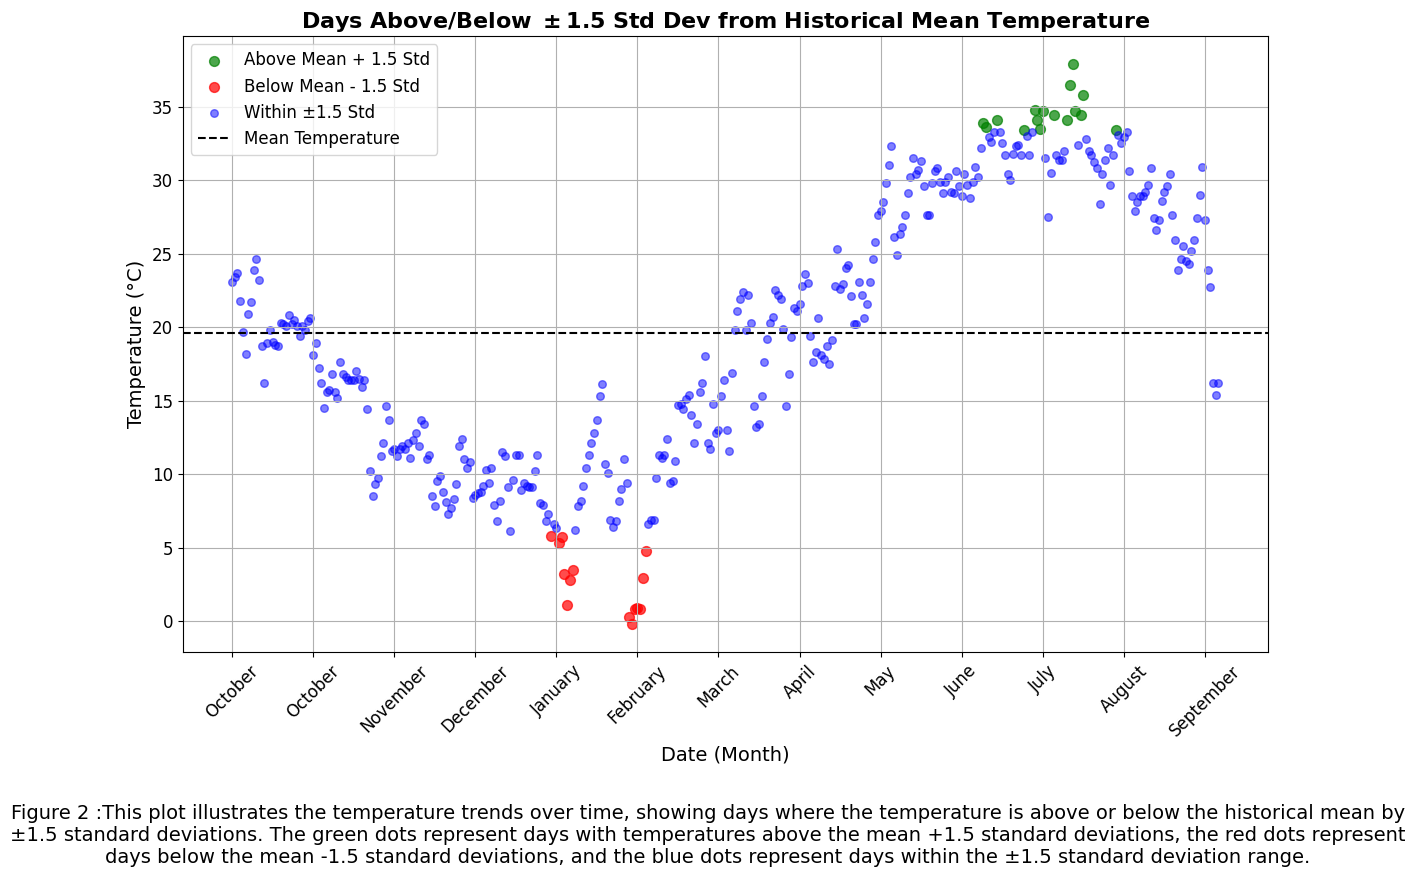

Table saved to E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std_Table.pdf
The majority of days are above the ±1.5 SD threshold.

Monthly Trends:
           days_above  days_below  total_days  trend
month                                               
January             0           3           3  below
February            0           9           9  below
March               0           2           2  below
April               0           0           0  below
May                 0           0           0  below
June                0           0           0  below
July                9           0           9  above
August              7           0           7  above
September           0           0           0  below
October             0           0           0  below
November            0           0           0  below
December            0           0           0  below


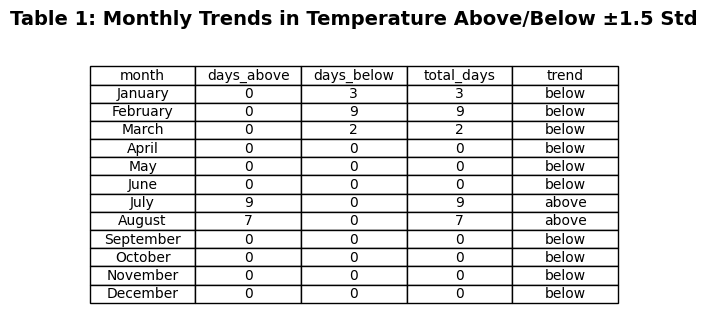

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_temperature_and_check_majority(data, temp_column='tavg', save_path=None):
    """
    Plot days where the temperature is above or below the historical mean by ±1.5 standard deviations,
    determine if the majority of days are above or below the mean ±1.5 SD, and analyze trends by month.
    Also saves the results in a nice table format in a PDF.

    Args:
        data (pd.DataFrame): DataFrame containing temperature data.
        temp_column (str): Column to calculate the mean temperature (default 'tavg').
        save_path (str): Optional path to save the figure as a PDF.
    
    Returns:
        str: A summary of the majority trend and monthly breakdown.
    """
    # Ensure the temperature column exists
    if temp_column not in data.columns:
        raise ValueError(f"The specified temperature column '{temp_column}' does not exist in the DataFrame.")

    # Calculate the historical mean and standard deviation
    historical_mean = data[temp_column].mean()
    historical_std = data[temp_column].std()
    
    # Define thresholds for ±1.5 SD
    upper_threshold = historical_mean + 1.5 * historical_std
    lower_threshold = historical_mean - 1.5 * historical_std

    # Create masks for categories
    above_significant = data[temp_column] > upper_threshold
    below_significant = data[temp_column] < lower_threshold
    normal = ~above_significant & ~below_significant  # Days within ±1.5 std deviation

    # Add month information
    data['month'] = data.index.month
    data['month_name'] = data.index.month_name()

    # Count days by month
    monthly_counts = data.groupby('month').apply(
        lambda x: pd.Series({
            'days_above': (x[temp_column] > upper_threshold).sum(),
            'days_below': (x[temp_column] < lower_threshold).sum(),
        })
    )
    monthly_counts['total_days'] = monthly_counts['days_above'] + monthly_counts['days_below']
    monthly_counts['trend'] = monthly_counts.apply(
        lambda x: 'above' if x['days_above'] > x['days_below'] else 'below', axis=1
    )

    # Print monthly trends with month names
    monthly_counts.index = monthly_counts.index.map(lambda x: pd.to_datetime(f'2024-{x:02d}-01').strftime('%B'))  # Convert month numbers to names
    print(monthly_counts)

    # Determine majority category overall
    count_above = above_significant.sum()
    count_below = below_significant.sum()
    count_normal = normal.sum()
    majority = "above" if count_above > count_below else "below" if count_below > count_above else "equal"

    print(f"Days above +1.5 SD: {count_above}")
    print(f"Days below -1.5 SD: {count_below}")
    print(f"Days within ±1.5 SD: {count_normal}")
    print(f"The majority of days are {majority} the ±1.5 SD threshold.")

    # Plot the results
    plt.figure(figsize=(14, 8))
    plt.scatter(data.index[above_significant], data[temp_column][above_significant], 
                color='green', label='Above Mean + 1.5 Std', alpha=0.7, s=50)
    plt.scatter(data.index[below_significant], data[temp_column][below_significant], 
                color='red', label='Below Mean - 1.5 Std', alpha=0.7, s=50)
    plt.scatter(data.index[normal], data[temp_column][normal], 
                color='blue', label='Within ±1.5 Std', alpha=0.5, s=30)
    plt.axhline(y=historical_mean, color='black', linestyle='--', label='Mean Temperature', linewidth=1.5)
    plt.title(r"$\mathbf{Days\ Above/Below\ \pm1.5\ Std\ Dev\ from\ Historical\ Mean\ Temperature}$", fontsize=16)
    plt.xlabel('Date (Month)', fontsize=14)
    plt.ylabel('Temperature (°C)', fontsize=14)

    # Set x-axis as month names
    plt.xticks(data.index[::30], data['month_name'][::30], rotation=45)  # Adjust ticks for clarity

    plt.legend(loc='best', fontsize=12)
    plt.grid(True)

  # Add a caption to the plot
    caption = (
        "Figure 2 :This plot illustrates the temperature trends over time, showing days where the temperature is "
        "above or below the historical mean by ±1.5 standard deviations. The green dots represent days with "
        "temperatures above the mean +1.5 standard deviations, the red dots represent days below the mean -1.5 "
        "standard deviations, and the blue dots represent days within the ±1.5 standard deviation range."
    )
    plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=14, color='black')

    # Save the plot as a PDF if save_path is provided
    if save_path:
        plt.savefig(save_path, format='pdf')
        print(f"Plot saved to {save_path}")

    # Show the plot
    plt.show()

    # Create and save the results as a table
    fig, ax = plt.subplots(figsize=(5.5, 3.5))  # Create a new figure for the table
    ax.axis('off')  # Hide the axis

    # Convert the DataFrame to a table and style it
    table_data = monthly_counts.reset_index()
    table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Adjust the table size
    
    # Add a title to the table
    fig.text(0.5, 0.95, 'Table 1: Monthly Trends in Temperature Above/Below ±1.5 Std', 
         ha='center', va='top', fontsize=14, fontweight='bold')

   # Tighten layout to reduce excess space
    plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)


    # Save the table as a PDF
    table_pdf_path = save_path.replace(".pdf", "_Table.pdf")
    plt.savefig(table_pdf_path, format='pdf')
    print(f"Table saved to {table_pdf_path}")
   

    # Return the majority result and monthly breakdown
    return f"The majority of days are {majority} the ±1.5 SD threshold.\n\nMonthly Trends:\n{monthly_counts}"

# Example usage
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
data['date'] = pd.to_datetime(data['date'])  # Convert the date column to datetime format
data.set_index('date', inplace=True)

# Call the function
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temperature_Above_Below_Mean_Plot_with_1_5Std.pdf'
result = plot_temperature_and_check_majority(data, temp_column='tavg', save_path=save_path)
print(result)



**Seasonal Temperature Analysis**
The dataset was segmented into four seasons using the following date ranges:

- **Winter**: December 21 to March 20
- **Spring**: March 21 to June 20
- **Summer**: June 21 to September 20
- **Fall**: September 21 to December 20

**Boxplot Analysis**
Two boxplots were generated for each season to examine temperature distributions before and after outlier removal:

•	**Outlier Identification:**

-	Z-Score (±1.5 SD).

-	Interquartile Range (IQR).

•	**Visualization Enhancements:**

-	Outliers identified by Z-Score were highlighted in yellow.

-	Outliers identified by IQR were marked in orange.

•	**Statistics:** Seasonal mean and standard deviation values were annotated on the plots.

**Outlier Removal**

Outliers were removed to recalibrate seasonal statistics and assess the impact on data distributions. 

C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\460221449.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axs[0].boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\460221449.py:115: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axs[1].boxplot(seasons_no_outliers, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,


Removed 17 outliers from Winter data (Total 18.68% removed)
Removed 18 outliers from Spring data (Total 19.57% removed)
Removed 11 outliers from Summer data (Total 11.96% removed)
Removed 0 outliers from Fall data (Total 0.00% removed)

Total percentage of data removed as outliers: 16.14%


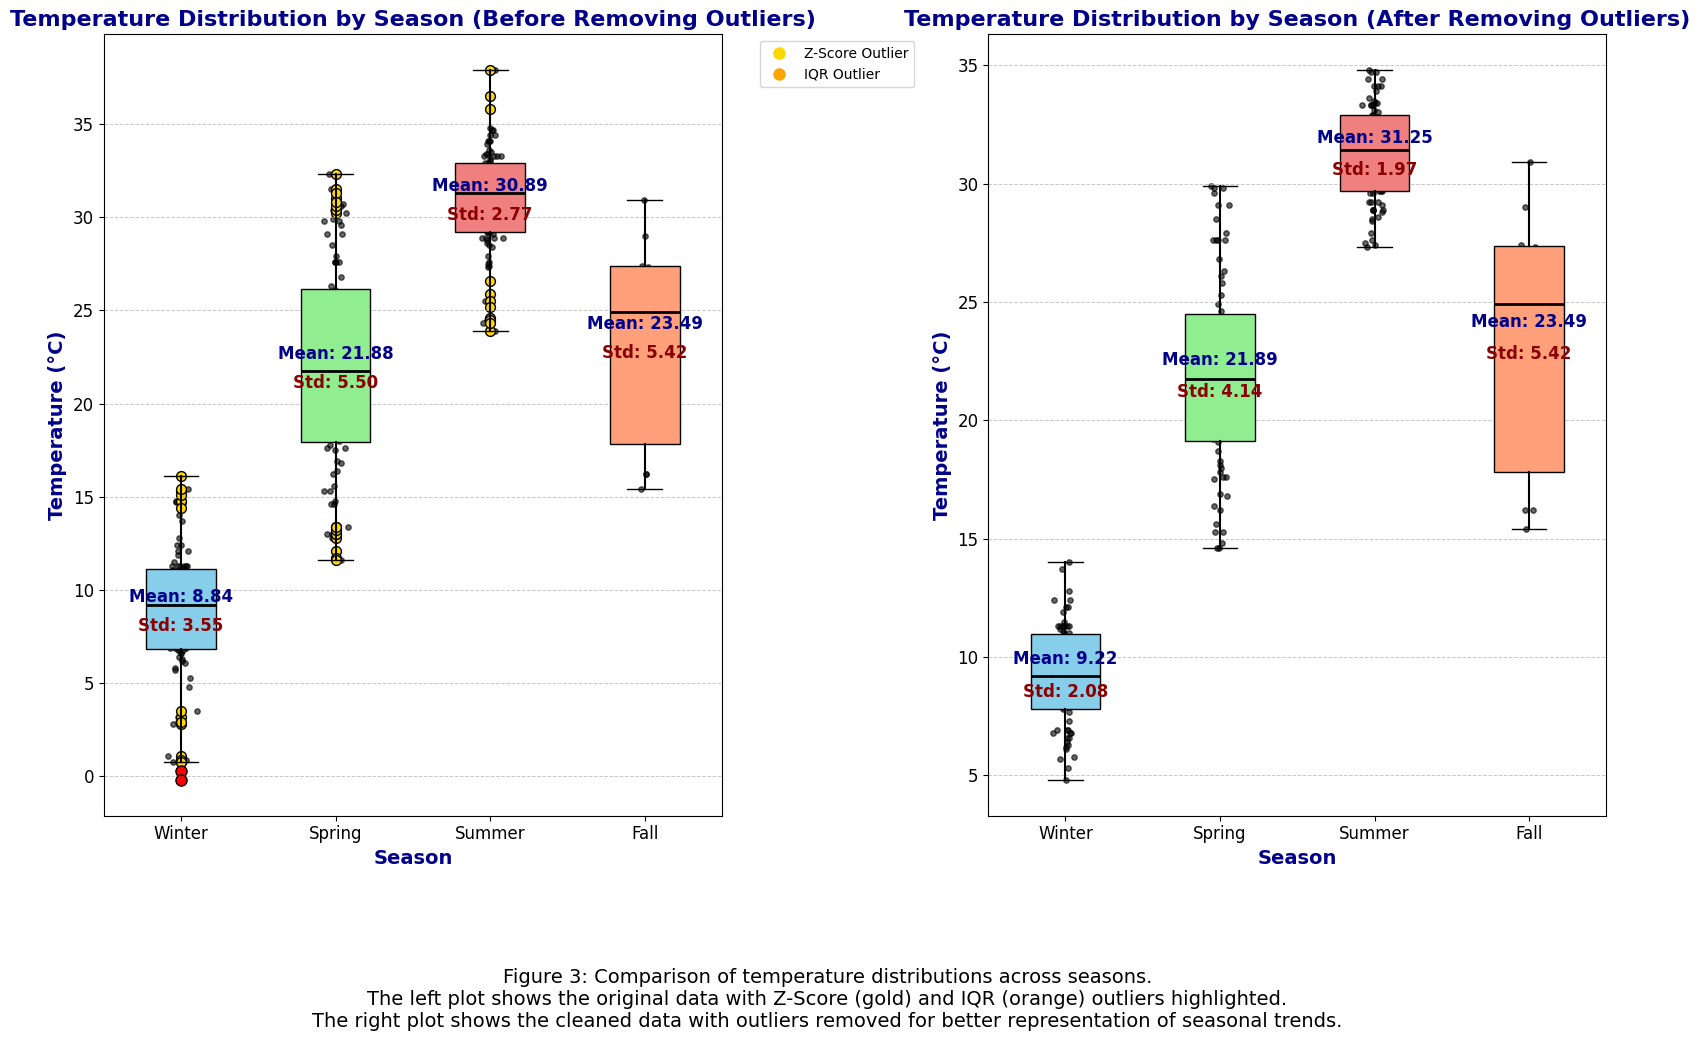

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter]['tavg'],
    'Spring': df[spring]['tavg'],
    'Summer': df[summer]['tavg'],
    'Fall': df[fall]['tavg']
}

# Prepare the data for each season
seasons_data = [seasons['Winter'], seasons['Spring'], seasons['Summer'], seasons['Fall']]

# Define colors for each season
box_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Function to calculate Z-Score and IQR outliers
def detect_outliers(data):
    # Z-Score method (±1.5 standard deviations)
    mean = np.mean(data)
    std = np.std(data)
    z_upper = mean + 1.5 * std
    z_lower = mean - 1.5 * std
    z_outliers = data[(data > z_upper) | (data < z_lower)]
    
    # IQR method
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    iqr_upper = q3 + 1.5 * iqr
    iqr_lower = q1 - 1.5 * iqr
    iqr_outliers = data[(data > iqr_upper) | (data < iqr_lower)]
    
    return z_outliers, iqr_outliers, mean, std

# Create a figure with two subplots (before and after removing outliers)
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

# Plot Before Removing Outliers
axs[0].set_title('Temperature Distribution by Season (Before Removing Outliers)', fontsize=16, fontweight='bold', color='darkblue')
axs[0].set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='darkblue')
axs[0].set_xlabel('Season', fontsize=14, fontweight='bold', color='darkblue')

# Create the boxplot (Before Removing Outliers)
bp = axs[0].boxplot(seasons_data, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
                    boxprops=dict(facecolor='lightgray', color='black'), whiskerprops=dict(color='black', linewidth=1.5),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'),
                    medianprops=dict(color='black', linewidth=2))

# Assign colors to each boxplot
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add scatter plots and annotate outliers (Before Removing)
for i, season_data in enumerate(seasons_data):
    jitter = np.random.normal(0, 0.03, len(season_data))  # Add slight horizontal jitter
    
    # Scatter individual data points
    axs[0].scatter([i + 1 + jitter_offset for jitter_offset in jitter], season_data,
                   color='black', alpha=0.6, s=15)

    # Detect outliers using both methods
    z_outliers, iqr_outliers, mean, std = detect_outliers(season_data)
    
    # Plot Z-Score outliers
    axs[0].scatter([i + 1] * len(z_outliers), z_outliers, color='gold', edgecolor='black', s=50, label='Z-Score Outlier')

    # Plot IQR outliers (now explicitly set to orange)
    axs[0].scatter([i + 1] * len(iqr_outliers), iqr_outliers, color='orange', edgecolor='black', s=50, label='IQR Outlier')

    # Annotate mean and std
    axs[0].text(i + 1, mean + 0.3, f'Mean: {mean:.2f}', ha='center', va='bottom', color='darkblue', fontsize=12, fontweight='bold')
    axs[0].text(i + 1, mean - 0.3, f'Std: {std:.2f}', ha='center', va='top', color='darkred', fontsize=12, fontweight='bold')

# Plot After Removing Outliers
axs[1].set_title('Temperature Distribution by Season (After Removing Outliers)', fontsize=16, fontweight='bold', color='darkblue')
axs[1].set_ylabel('Temperature (°C)', fontsize=14, fontweight='bold', color='darkblue')
axs[1].set_xlabel('Season', fontsize=14, fontweight='bold', color='darkblue')

# Remove outliers and plot
seasons_no_outliers = []
total_removed = 0  # Variable to keep track of total removed outliers
season_names = ['Winter', 'Spring', 'Summer', 'Fall']

for season_data, season_name in zip(seasons_data, season_names):
    z_outliers, iqr_outliers, mean, std = detect_outliers(season_data)
    clean_data = season_data[~season_data.isin(z_outliers) & ~season_data.isin(iqr_outliers)]
    seasons_no_outliers.append(clean_data)
    
    # Calculate percentage of removed data
    removed_data = len(season_data) - len(clean_data)
    total_removed += removed_data
    print(f"Removed {removed_data} outliers from {season_name} data (Total {removed_data / len(season_data) * 100:.2f}% removed)")

# Calculate the total percentage of removed data across all seasons
total_data_points = sum(len(season_data) for season_data in seasons_data)
percentage_removed = (total_removed / total_data_points) * 100
print(f"\nTotal percentage of data removed as outliers: {percentage_removed:.2f}%")

# Create the boxplot (After Removing Outliers)
bp = axs[1].boxplot(seasons_no_outliers, labels=['Winter', 'Spring', 'Summer', 'Fall'], patch_artist=True,
                    boxprops=dict(facecolor='lightgray', color='black'), whiskerprops=dict(color='black', linewidth=1.5),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8, linestyle='none'),
                    medianprops=dict(color='black', linewidth=2))

# Assign colors to each boxplot
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)

# Add scatter plots and annotate statistics (After Removing Outliers)
for i, season_data in enumerate(seasons_no_outliers):
    jitter = np.random.normal(0, 0.03, len(season_data))
    axs[1].scatter([i + 1 + jitter_offset for jitter_offset in jitter], season_data, color='black', alpha=0.6, s=15)
    mean = np.mean(season_data)
    std = np.std(season_data)
    axs[1].text(i + 1, mean + 0.3, f'Mean: {mean:.2f}', ha='center', va='bottom', color='darkblue', fontsize=12, fontweight='bold')
    axs[1].text(i + 1, mean - 0.3, f'Std: {std:.2f}', ha='center', va='top', color='darkred', fontsize=12, fontweight='bold')

# Add a simple legend to the right of the first plot
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Z-Score Outlier'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='IQR Outlier')
]
axs[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Add gridlines to both plots
for ax in axs:
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a caption to the plots
caption = ("Figure 3: Comparison of temperature distributions across seasons.\n"
           "The left plot shows the original data with Z-Score (gold) and IQR (orange) outliers highlighted.\n"
           "The right plot shows the cleaned data with outliers removed for better representation of seasonal trends.")
plt.figtext(0.5, -0.15, caption, wrap=True, horizontalalignment='center', fontsize=14, color='black')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


**Seasonal  Heatmap**

To visualize temperature variations, daily averages for each season were combined into a matrix. A heatmap, with a color gradient from blue (cold) to red (warm), displayed these seasonal averages.

C:\Users\bmehe\AppData\Local\Temp\ipykernel_83472\3584657650.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  season_matrix = season_matrix.fillna(method='ffill').fillna(method='bfill')


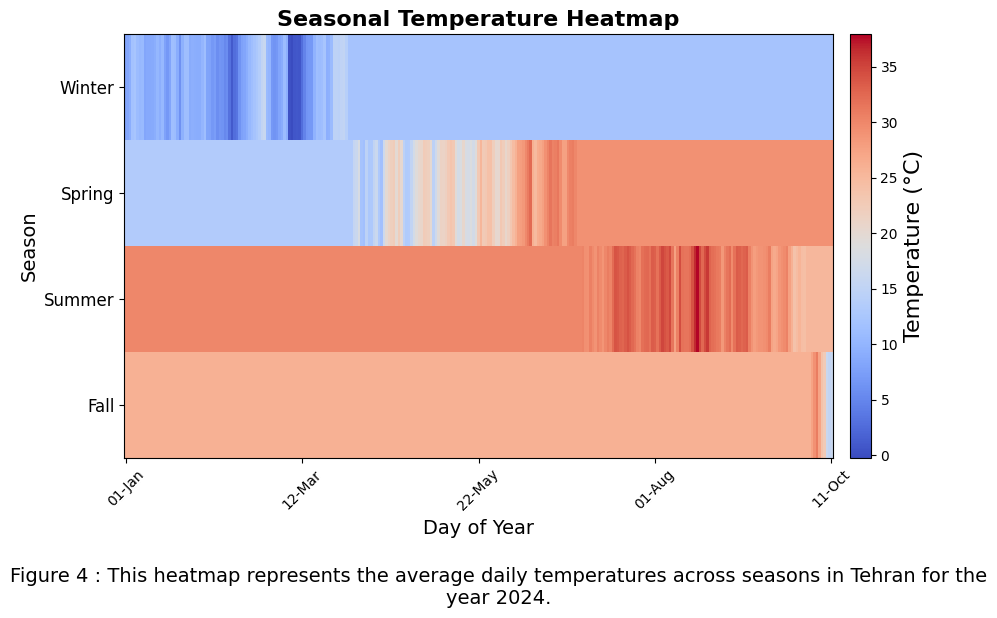

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter],
    'Spring': df[spring],
    'Summer': df[summer],
    'Fall': df[fall]
}

# Prepare the data for each season and ensure consistency in length
resampled_seasons = {}
for season, data in seasons.items():
    resampled_seasons[season] = data.set_index('date').resample('D').mean()['tavg']

# Convert the resampled data to a DataFrame where each season is a column
season_matrix = pd.DataFrame({
    'Winter': resampled_seasons['Winter'],
    'Spring': resampled_seasons['Spring'],
    'Summer': resampled_seasons['Summer'],
    'Fall': resampled_seasons['Fall']
})

# Ensure all seasons have the same length using forward-fill and backward-fill
season_matrix = season_matrix.fillna(method='ffill').fillna(method='bfill')

# Plot the heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Create a colormap from blue (cold) to red (warm)
cmap = plt.get_cmap("coolwarm")

# Plot the heatmap without interpolation
cax = ax.imshow(season_matrix.T, cmap=cmap, aspect='auto', interpolation='none')

# Add color bar for temperature scale
cbar = plt.colorbar(cax, ax=ax, label='Temperature (°C)', pad=0.02)
cbar.ax.tick_params(labelsize=10)

# Add labels and title
ax.set_title('Seasonal Temperature Heatmap', fontsize=16, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=14)
ax.set_ylabel('Season', fontsize=14)

# Set the x-ticks and y-ticks labels
x_ticks = np.linspace(0, len(season_matrix) - 1, 5).astype(int)
x_labels = pd.date_range(start='2024-01-01', periods=len(season_matrix), freq='D').strftime('%d-%b')[x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, fontsize=10)

ax.set_yticks(np.arange(4))
ax.set_yticklabels(['Winter', 'Spring', 'Summer', 'Fall'], fontsize=12)

# Add a caption below the plot
caption = "Figure 4 : This heatmap represents the average daily temperatures across seasons in Tehran for the year 2024."
plt.figtext(0.5, -0.02, caption, wrap=True, horizontalalignment='center', fontsize=14, color='black')

# Ensure layout is tight
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to fit caption

# Save the figure as a PDF
output_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Seasonal_Temperature_Heatmap.pdf'
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()




**Statistical Analysis**

**Distributions of Weather Variables**


•	Variables analyzed: tavg, wspd, prcp.

•	**Methods:**
-	Histograms and kernel density estimates (KDE).
-	Skewness, kurtosis, and Shapiro-Wilk normality tests.

•	**Results:** None of the analyzed variables followed a normal distribution.


C:\Users\bmehe\AppData\Local\Temp\ipykernel_51748\1484163166.py:29: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed in 3.10.
  with PdfPages(save_path) as pdf:


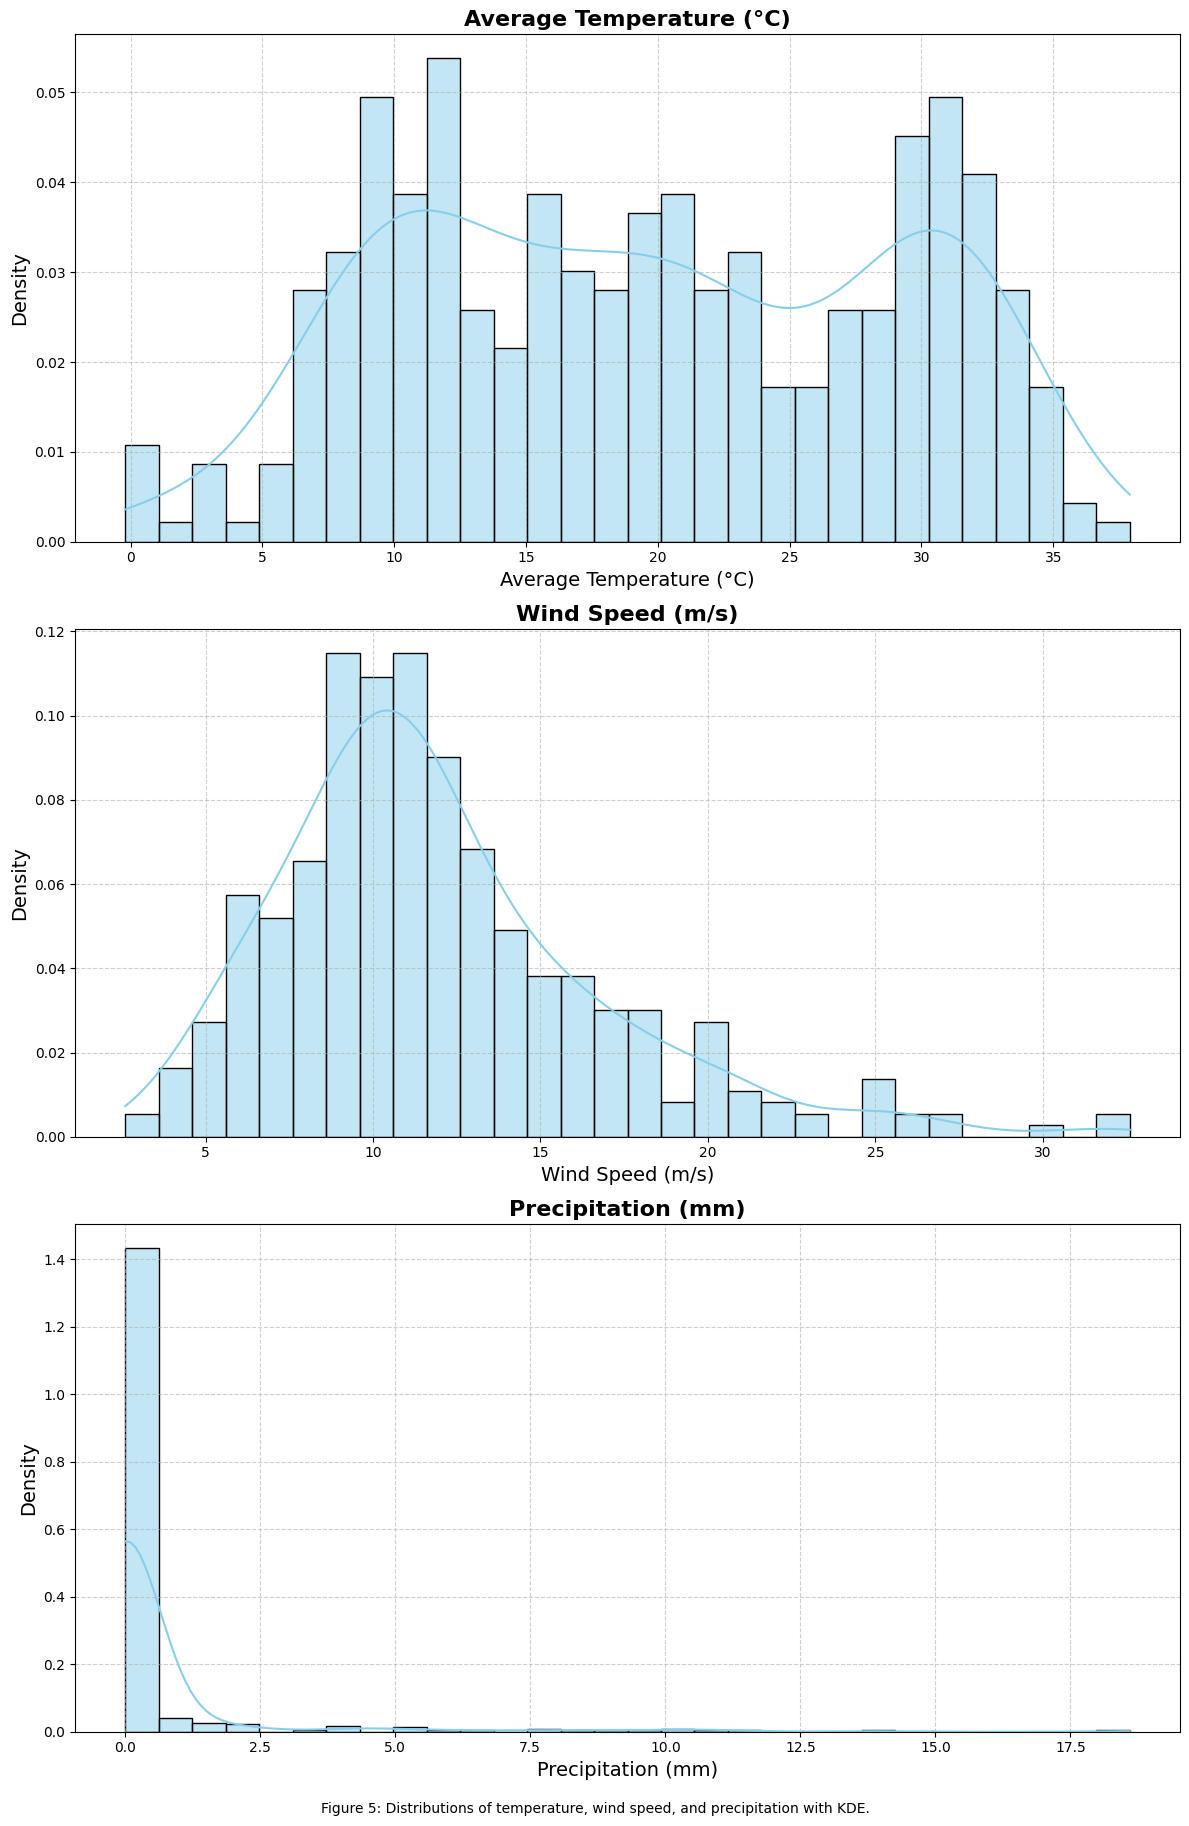


Statistical Analysis Table:
      Skewness  Kurtosis Shapiro-Wilk Test Stat Shapiro-Wilk P-value  \
tavg   0.00983  -1.15549               0.956811                  0.0   
wspd   1.18579  2.034058               0.927751                  0.0   
prcp  5.042631   28.8941                0.29523                  0.0   

     Normal Distribution  
tavg                  No  
wspd                  No  
prcp                  No  
Statistical analysis table saved at: E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950/Weather_Stats_Table.csv


<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skew, kurtosis
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def save_figure_with_caption(fig, caption, save_path):
    """
    Save a Matplotlib figure as a PDF with a caption.
    """
    with PdfPages(save_path) as pdf:
        pdf.savefig(fig, bbox_inches='tight')
        plt.figtext(0.5, -0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)
        pdf.close()

def analyze_distributions(data, columns, output_folder=None):
    """
    Analyze and visualize the distribution of specified data columns.
    - Plot histograms and KDEs for each column in subplots.
    - Calculate skewness, kurtosis, and normality test for each column.
    - Save the figure and table as files.
    """
    stats_results = {}
    num_columns = len(columns)
    
    # Prepare subplots
    fig, axs = plt.subplots(num_columns, 1, figsize=(12, 6 * num_columns), sharex=False)
    if num_columns == 1:
        axs = [axs]  # Ensure axs is iterable even for 1 subplot

    # Define descriptive titles for each column
    column_titles = {
        'tavg': 'Average Temperature (°C)',
        'prcp': 'Precipitation (mm)',
        'wspd': 'Wind Speed (m/s)'
    }

    for i, column in enumerate(columns):
        col_data = data[column].dropna()
        
        # Calculate skewness, kurtosis, and normality
        col_skewness = skew(col_data)
        col_kurtosis = kurtosis(col_data)
        shapiro_stat, shapiro_p = shapiro(col_data)
        normality = "Yes" if shapiro_p > 0.05 else "No"
        
        # Add results to table
        stats_results[column] = {
            "Skewness": col_skewness,
            "Kurtosis": col_kurtosis,
            "Shapiro-Wilk Test Stat": shapiro_stat,
            "Shapiro-Wilk P-value": shapiro_p,
            "Normal Distribution": normality
        }
        
        # Plot histogram and KDE
        sns.histplot(col_data, bins=30, kde=True, color='skyblue', edgecolor='black', stat="density", ax=axs[i])
        axs[i].set_title(column_titles[column], fontsize=16, fontweight='bold')  # Updated title
        axs[i].set_xlabel(column_titles[column], fontsize=14)
        axs[i].set_ylabel('Density', fontsize=14)
        axs[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    # Save the figure
    if output_folder:
        fig_path = f"{output_folder}/Weather_Distributions.pdf"
    # Add a caption below the plot
    caption = "Figure 5: Distributions of temperature, wind speed, and precipitation with KDE."
    save_figure_with_caption(fig, caption, fig_path)
    plt.show()
    plt.figtext(0.5, -0.02, caption, wrap=True, horizontalalignment='center', fontsize=14, color='black')
    
    # Save and print the table
    stats_table = pd.DataFrame(stats_results).T
    print("\nStatistical Analysis Table:")
    print(stats_table)
    
    if output_folder:
        table_path = f"{output_folder}/Weather_Stats_Table.csv"
        stats_table.to_csv(table_path)
        print(f"Statistical analysis table saved at: {table_path}")

# Specify the path of the Excel file and the output folder
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
output_folder = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950'

# Load and prepare data
data = load_and_prepare_data(file_path)

# Analyze the distributions of temperature, wind speed, and precipitation
columns_to_analyze = ['tavg', 'wspd', 'prcp']
analyze_distributions(data, columns=columns_to_analyze, output_folder=output_folder)


**Temperature and Precipitation Trends**

Temperature and precipitation trends were jointly analyzed using a time-series plot:

•	Temperature: Daily minimum, maximum, and average values.

•	Precipitation: Represented as dark purple bars.

•	**Findings:**

-	Maximum precipitation (18.6 mm) occurred in September.

-	Driest months: October, December, June, July, and August.

This comprehensive methodology ensured robust insights into Tehran’s weather dynamics over the observed period.


C:\Users\bmehe\AppData\Local\Temp\ipykernel_51748\3546862706.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = data['prcp'].resample('M').mean()


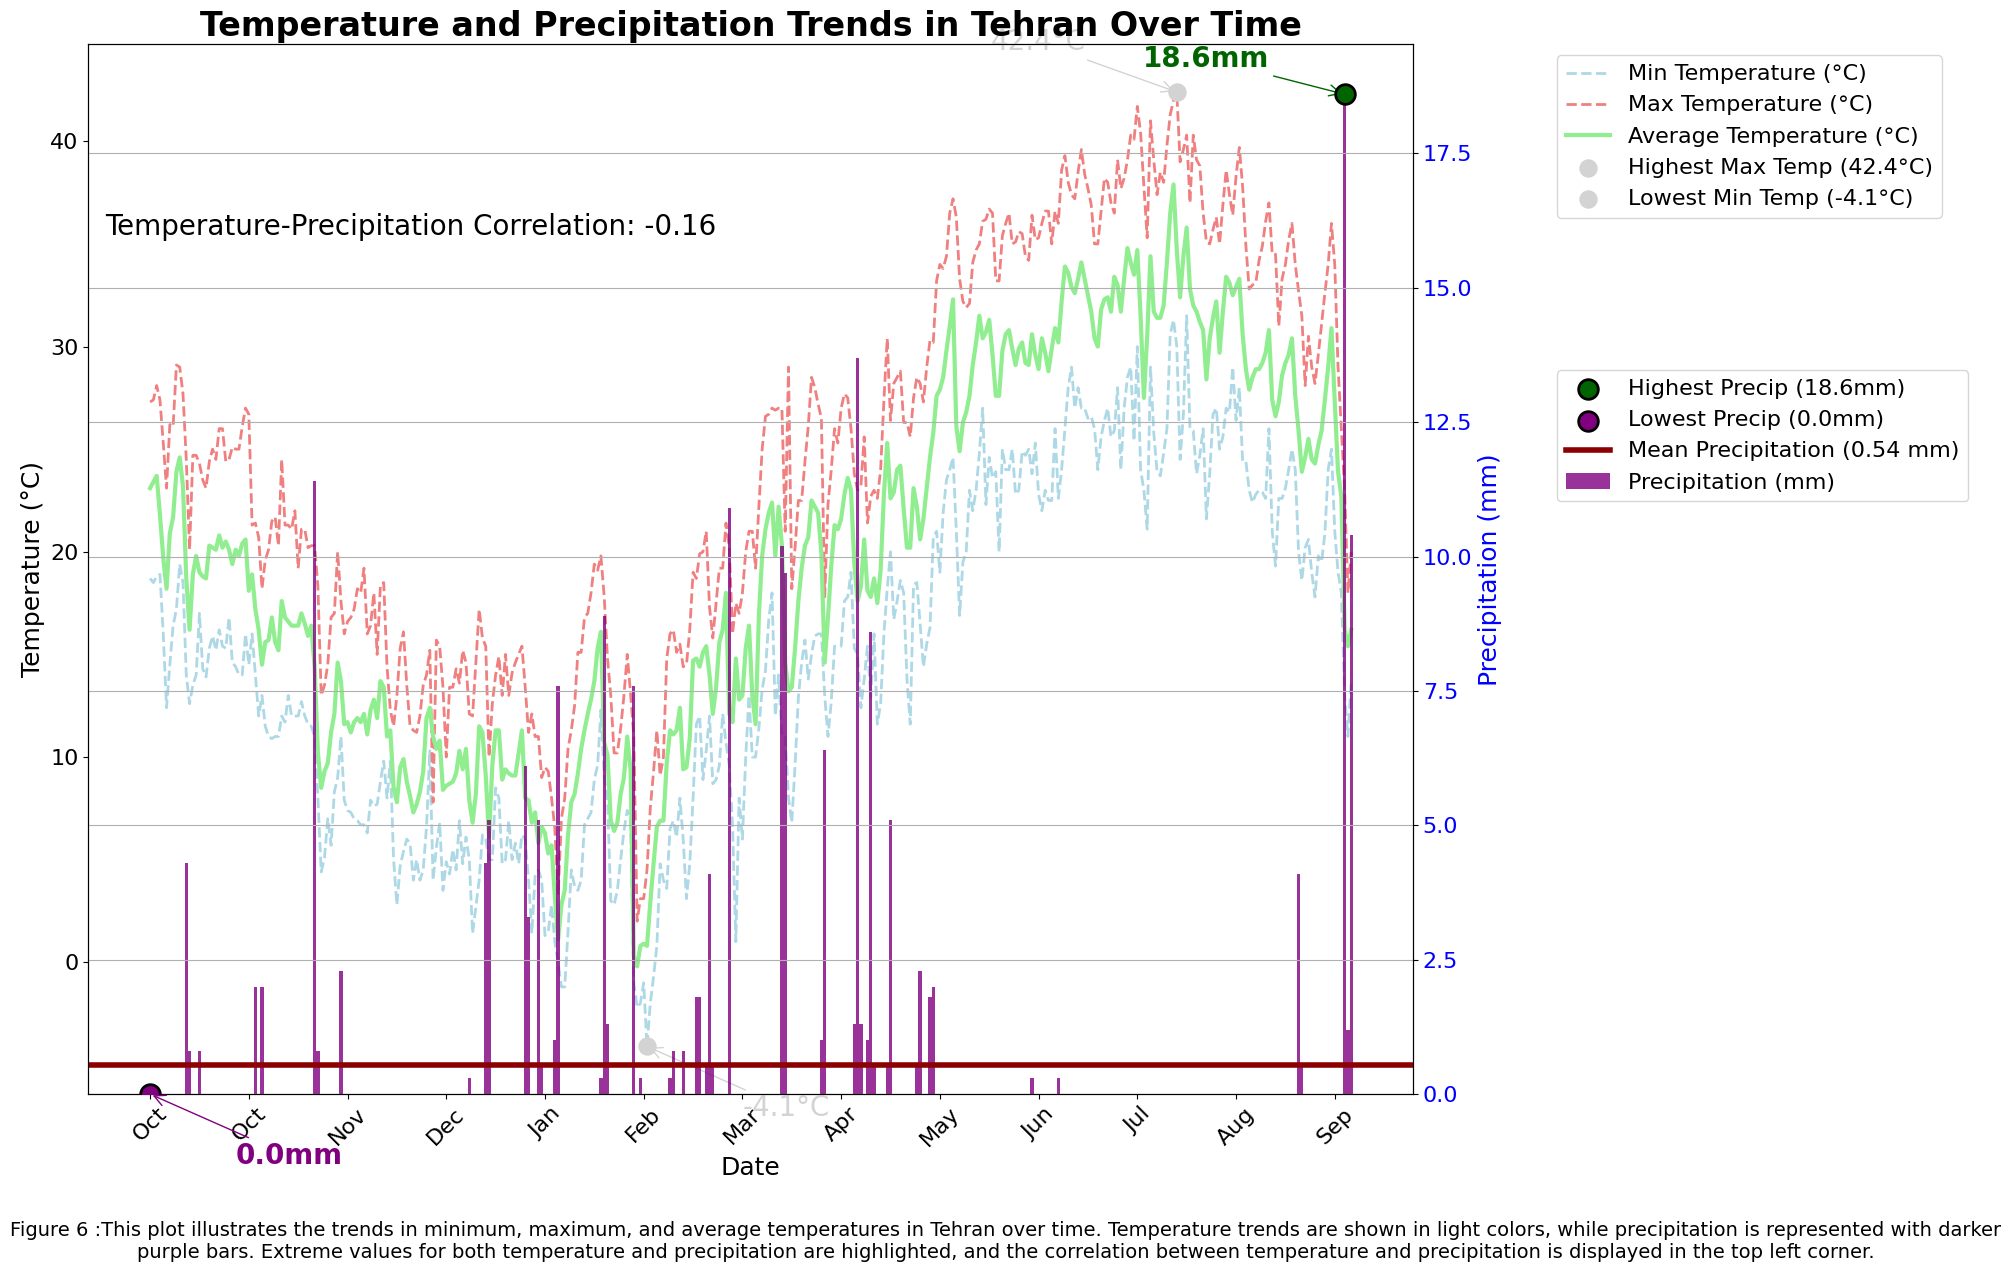

Months with less than the mean precipitation:
['Oct', 'Dec', 'Jun', 'Jul', 'Aug']


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    """
    Load the Excel file and preprocess the data.
    - Converts the 'date' column to datetime.
    - Sets 'date' as the index.
    
    Args:
        file_path (str): Path to the Excel file.
    
    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    data = pd.read_excel(file_path)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    return data

def plot_temperature_and_precipitation(data, save_path=None):
    """
    Plot temperature trends (avg, min, max) and precipitation on the same graph.
    - Temperature will be in light colors.
    - Precipitation will be darker (dark purple) and with thicker bars.
    Also identifies and highlights extreme values (max/min temperature and precipitation).
    - Computes and displays the correlation between temperature and precipitation.
    - Displays months with less than the mean precipitation.
    
    Args:
        data (pd.DataFrame): DataFrame containing temperature and precipitation data.
        save_path (str): Optional path to save the figure as a PDF.
    """
    
    # Find extreme values (max/min for temperature and precipitation)
    max_temp = data['tmax'].max()
    max_temp_date = data['tmax'].idxmax()
    min_temp = data['tmin'].min()
    min_temp_date = data['tmin'].idxmin()
    
    max_precip = data['prcp'].max()
    max_precip_date = data['prcp'].idxmax()
    min_precip = data['prcp'].min()
    min_precip_date = data['prcp'].idxmin()

    # Calculate monthly mean precipitation
    monthly_precip = data['prcp'].resample('M').mean()
    
    # Calculate overall mean precipitation
    mean_precip = data['prcp'].mean()
    
    # Identify months with less than the mean precipitation
    months_below_mean = monthly_precip[monthly_precip < mean_precip].index.strftime('%b')

    # Calculate correlation between temperature and precipitation
    temp_precip_correlation = data[['tavg', 'prcp']].corr().iloc[0, 1]
    
    # Create the plot with a larger figure size
    fig, ax1 = plt.subplots(figsize=(20, 12))  # Bigger figure size
    
    # Plot temperature trends with light colors
    ax1.plot(data.index, data['tmin'], label='Min Temperature (°C)', color='lightblue', linestyle='--', linewidth=2)
    ax1.plot(data.index, data['tmax'], label='Max Temperature (°C)', color='lightcoral', linestyle='--', linewidth=2)
    ax1.plot(data.index, data['tavg'], label='Average Temperature (°C)', color='lightgreen', linewidth=3)
    ax1.set_xlabel('Date', fontsize=18)
    ax1.set_ylabel('Temperature (°C)', color='black', fontsize=18)
    ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
    
    # Create a second y-axis for precipitation with dark purple color and thicker bars
    ax2 = ax1.twinx()
    ax2.bar(data.index, data['prcp'], color='purple', alpha=0.8, width=1.0, label='Precipitation (mm)', linewidth=2)
    ax2.set_ylabel('Precipitation (mm)', color='blue', fontsize=18)
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
    
    # Highlight extreme values on the plot
    ax1.scatter(max_temp_date, max_temp, color='lightgray', label=f'Highest Max Temp ({max_temp}°C)', s=150, zorder=5)
    ax1.scatter(min_temp_date, min_temp, color='lightgray', label=f'Lowest Min Temp ({min_temp}°C)', s=150, zorder=5)
    ax2.scatter(max_precip_date, max_precip, color='darkgreen', label=f'Highest Precip ({max_precip}mm)', s=200, zorder=5, edgecolor='black', linewidth=2)
    ax2.scatter(min_precip_date, min_precip, color='purple', label=f'Lowest Precip ({min_precip}mm)', s=200, zorder=5, edgecolor='black', linewidth=2)

    # Annotate extreme values with bold text for precipitation and light color for temperature
    ax1.annotate(f'{max_temp}°C', (max_temp_date, max_temp), textcoords="offset points", xytext=(-100, 30), ha='center', color='lightgray', fontsize=20, fontweight='normal', arrowprops=dict(arrowstyle="->", color='lightgray'))
    ax1.annotate(f'{min_temp}°C', (min_temp_date, min_temp), textcoords="offset points", xytext=(100, -50), ha='center', color='lightgray', fontsize=20, fontweight='normal', arrowprops=dict(arrowstyle="->", color='lightgray'))
    ax2.annotate(f'{max_precip}mm', (max_precip_date, max_precip), textcoords="offset points", xytext=(-100, 20), ha='center', color='darkgreen', fontsize=20, fontweight='bold', arrowprops=dict(arrowstyle="->", color='darkgreen'))
    ax2.annotate(f'{min_precip}mm', (min_precip_date, min_precip), textcoords="offset points", xytext=(100, -50), ha='center', color='purple', fontsize=20, fontweight='bold', arrowprops=dict(arrowstyle="->", color='purple'))

    # Add a horizontal line for the mean precipitation (dark red with thick line)
    ax2.axhline(y=mean_precip, color='darkred', linestyle='-', linewidth=4, label=f'Mean Precipitation ({mean_precip:.2f} mm)')
    
    # Add title and grid
    plt.title('Temperature and Precipitation Trends in Tehran Over Time', fontsize=24, fontweight='bold')
    plt.grid(True)
    
    # Move the legends outside the plot further right
    ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.7), fontsize=16)

    # Format X-axis to show month names
    ax1.set_xticks(data.index[::int(len(data)/12)])  # Show 12 ticks, approximately one per month
    ax1.set_xticklabels(data.index.strftime('%b')[::int(len(data)/12)], rotation=45, fontsize=16)
    
    # Display correlation in the top-left of the plot
    plt.figtext(0.05, 0.8, f'Temperature-Precipitation Correlation: {temp_precip_correlation:.2f}', fontsize=20, color='black', ha='left')
    
    # Adding the caption to the figure
    caption = (
        "Figure 6 :This plot illustrates the trends in minimum, maximum, and average temperatures in Tehran over time. "
        "Temperature trends are shown in light colors, while precipitation is represented with darker purple bars. "
        "Extreme values for both temperature and precipitation are highlighted, and the correlation between "
        "temperature and precipitation is displayed in the top left corner."
    )
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=14, color='black')
    
    # Adjust layout to fit everything properly
    plt.tight_layout()
    
    # Save the figure as a PDF if save_path is provided
    if save_path:
        plt.savefig(save_path, format='pdf')

    # Show the plot
    plt.show()
    
    # Print months with less than mean precipitation
    print("Months with less than the mean precipitation:")
    print(list(months_below_mean))

# Call the function to plot the combined temperature and precipitation data
save_path = r'E:\CompAppTools\FinalProject-MH\Final_Project_CMSC6950\Temp_Precip_Plot_with_Mean.pdf'  
plot_temperature_and_precipitation(data, save_path)



**Visualizing Temperature and Precipitation Trends**

To analyze seasonal trends, weather data was processed to compute key statistics—minimum, maximum, mean, median, and standard deviation—for temperature, precipitation, and wind speed. These metrics were organized into a comprehensive table for better interpretation.

**Visualization Technique (Grouped Bar Chart):** A bar chart compared the average values of these variables across the four seasons. Precise annotations were included to enhance readability.

**Key Findings**

-	Wind Speed: Remained consistent across seasons, ranging between 11 and 14 m/s.
-	Precipitation: Minimal during summer, averaging only 0.1 mm.
-	Temperature: Summer recorded the highest average temperature of 30.9°C.


         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
0  2023-10-01  23.1  18.7  27.3   0.0   NaN    63   9.3   NaN  1013.6   NaN
1  2023-10-02  23.4  18.5  27.4   0.0   NaN   306  13.6   NaN  1013.1   NaN
2  2023-10-03  23.7  18.8  28.1   0.0   NaN   258  19.0   NaN  1014.8   NaN
3  2023-10-04  21.8  18.9  27.4   0.0   NaN   271  21.0   NaN  1017.6   NaN
4  2023-10-05  19.7  16.0  25.3   0.0   NaN   272  32.0   NaN  1017.9   NaN

Table 2: Seasonal Statistics of Temperature, Precipitation, and Wind Speed
+----+----------+-----------------+-----------------+------------------+--------------------+-----------------+-------------------+-------------------+--------------------+----------------------+-------------------+------------------------+------------------------+-------------------------+---------------------------+------------------------+
|    | Season   |   Min Temp (°C) |   Max Temp (°C) |   Mean Temp (°C) |   Median Temp (°C) |   Std Temp (°C) |   Min Preci

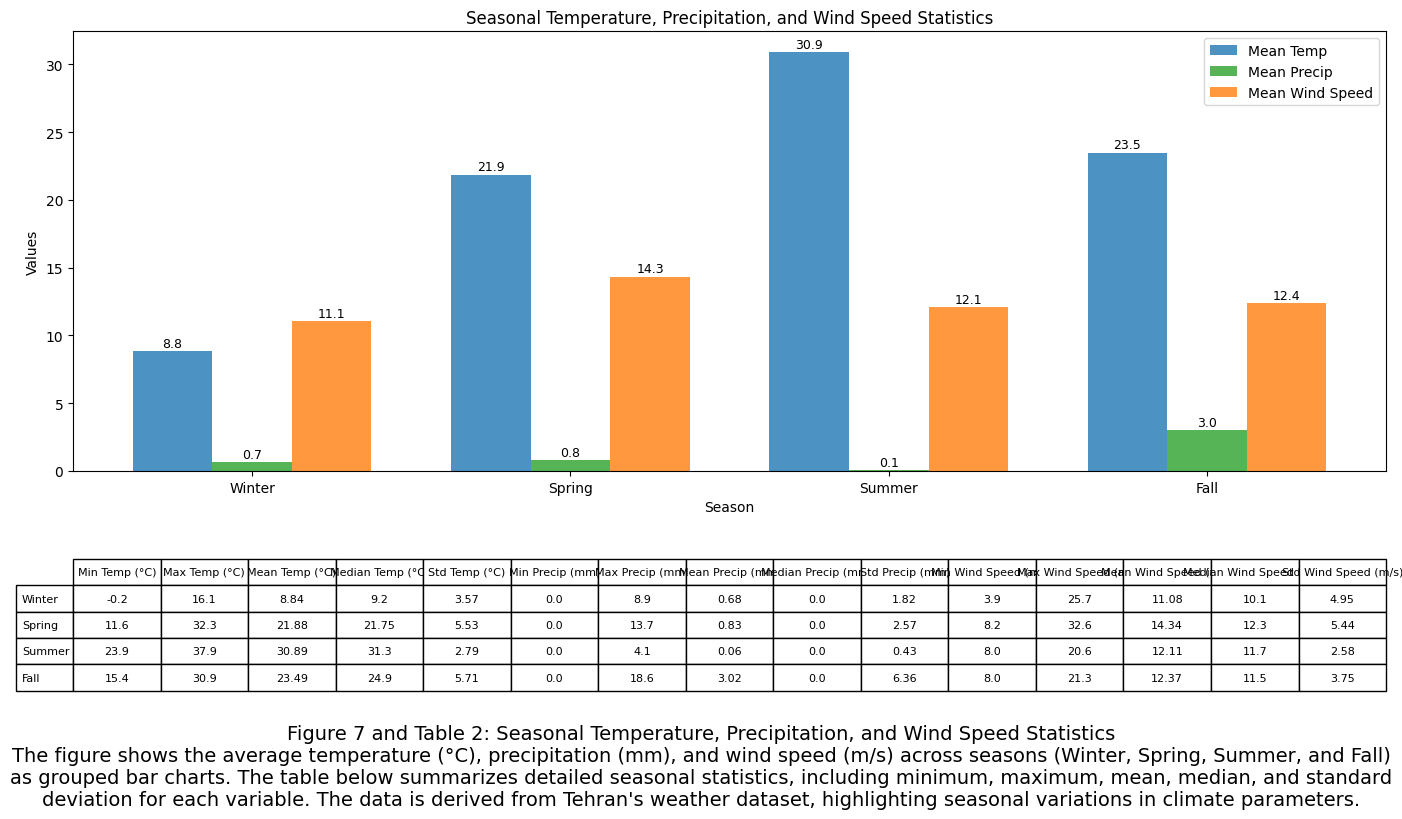

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate  # For pretty-printing tables

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Check the first few rows of the data to confirm it has loaded correctly
print(df.head())

# Assuming 'date' column is in the format 'YYYY-MM-DD', convert it to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter],
    'Spring': df[spring],
    'Summer': df[summer],
    'Fall': df[fall]
}

# Initialize an empty list to store statistics
season_stats = []

# Calculate the statistics for each season
for season, data in seasons.items():
    temp_stats = {
        'Season': season,
        'Min Temp (°C)': data['tavg'].min(),
        'Max Temp (°C)': data['tavg'].max(),
        'Mean Temp (°C)': data['tavg'].mean(),
        'Median Temp (°C)': data['tavg'].median(),
        'Std Temp (°C)': data['tavg'].std(),
        'Min Precip (mm)': data['prcp'].min(),
        'Max Precip (mm)': data['prcp'].max(),
        'Mean Precip (mm)': data['prcp'].mean(),
        'Median Precip (mm)': data['prcp'].median(),
        'Std Precip (mm)': data['prcp'].std(),
        'Min Wind Speed (m/s)': data['wspd'].min(),
        'Max Wind Speed (m/s)': data['wspd'].max(),
        'Mean Wind Speed (m/s)': data['wspd'].mean(),
        'Median Wind Speed (m/s)': data['wspd'].median(),
        'Std Wind Speed (m/s)': data['wspd'].std(),
    }
    season_stats.append(temp_stats)

# Convert to DataFrame for better display
season_stats_df = pd.DataFrame(season_stats)

# Adding a caption for the table
print("\nTable 2: Seasonal Statistics of Temperature, Precipitation, and Wind Speed")
print(tabulate(season_stats_df, headers='keys', tablefmt='grid'))

# Plotting grouped bar chart for temperature, precipitation, and wind speed
x = np.arange(len(season_stats_df['Season']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting offset bars for temperature, precipitation, and wind speed
temp_bars = ax.bar(x - width, season_stats_df['Mean Temp (°C)'], width, label='Mean Temp', color='tab:blue', alpha=0.8)
precip_bars = ax.bar(x, season_stats_df['Mean Precip (mm)'], width, label='Mean Precip', color='tab:green', alpha=0.8)
wspd_bars = ax.bar(x + width, season_stats_df['Mean Wind Speed (m/s)'], width, label='Mean Wind Speed', color='tab:orange', alpha=0.8)

# Add labels, title, and legend
ax.set_xlabel('Season')
ax.set_ylabel('Values')
ax.set_title('Seasonal Temperature, Precipitation, and Wind Speed Statistics')
ax.set_xticks(x)
ax.set_xticklabels(season_stats_df['Season'])
ax.legend()

# Annotate bar values for each variable
for bar in temp_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in precip_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)
for bar in wspd_bars:
    ax.annotate(f'{bar.get_height():.1f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

# Adding a table to the figure
table_data = season_stats_df.set_index('Season').round(2)  # Format values to 2 decimal points
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  rowLabels=table_data.index,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0, -0.5, 1, 0.3])  # Adjust bbox for positioning

table.auto_set_font_size(False)
table.set_fontsize(8)

# Adding a comprehensive caption below the figure and table
caption_text = (
    "Figure 7 and Table 2: Seasonal Temperature, Precipitation, and Wind Speed Statistics\n"
    "The figure shows the average temperature (°C), precipitation (mm), and wind speed (m/s) across seasons (Winter, Spring, Summer, and Fall) as grouped bar charts. "
    "The table below summarizes detailed seasonal statistics, including minimum, maximum, mean, median, and standard deviation for each variable. "
    "The data is derived from Tehran's weather dataset, highlighting seasonal variations in climate parameters."
)

fig.text(0.5, -0.01, caption_text, ha='center', fontsize=14, wrap=True)  

# Save the figure as a PDF
output_path = r'E:\CompAppTools\Project\Seasonal_Statistics.pdf'
plt.savefig(output_path, format='pdf', bbox_inches='tight')

fig.tight_layout()
plt.show()


**Correlation Analysis**

**Correlation Heatmap**

A correlation heatmap was developed to examine relationships between key numerical variables, including: tavg (average temperature), prcp (precipitation), wspd (wind speed), and pres (atmospheric pressure).

Variables with significant missing data, such as snow, wind gust, and solar radiation, were excluded. The correlation matrix was computed, and a heatmap with annotated coefficients and a color scale was generated to visually represent interdependencies.

**Findings**
-	Temperature and Pressure: Moderate negative correlation (-0.76).
-	Temperature and Precipitation: Very weak negative correlation (-0.16).
-	Wind Speed and Pressure: Weak negative correlation (-0.31).
-	Wind Speed and Temperature: Weak positive correlation (0.12).

These results highlight a strong inverse relationship between temperature and pressure, while other pairs exhibited minimal correlation.

**Pairplot Analysis**

A pairplot was created to further explore pairwise relationships among the variables. This visualization included:

•	**Kernel Density Estimations (KDE):** Displayed on the diagonal to represent individual variable distributions.

•	**Scatterplots:** Showcased pairwise relationships for each combination of variables.

**Findings**

•	**Distributions:** Temperature and pressure showed relatively even distributions, while precipitation and wind speed were highly skewed.

•	**Scatterplots:** Revealed weak or no significant trends, except for a slight negative correlation between temperature and wind speed/pressure.

Overall, the pairplot emphasized the lack of strong inter-variable correlations in the dataset.


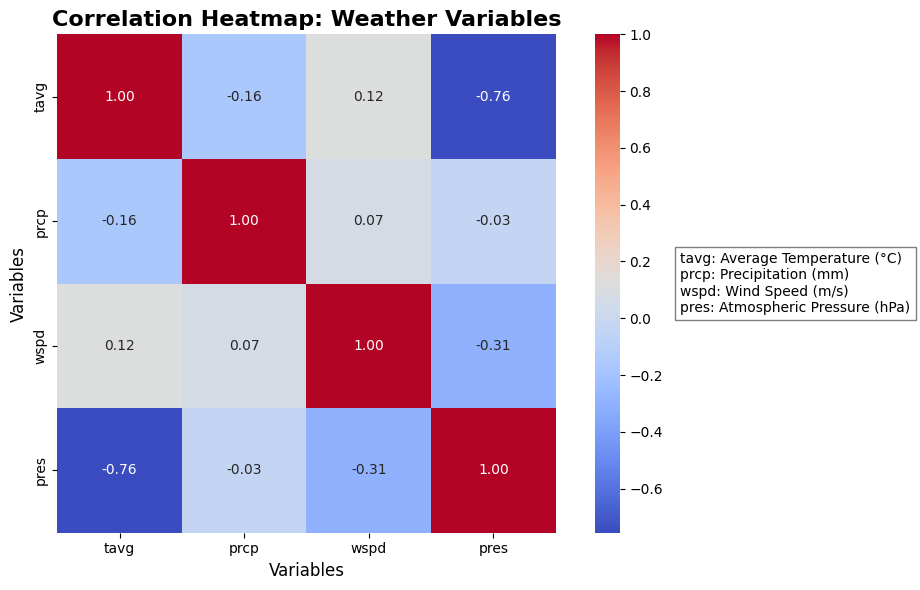

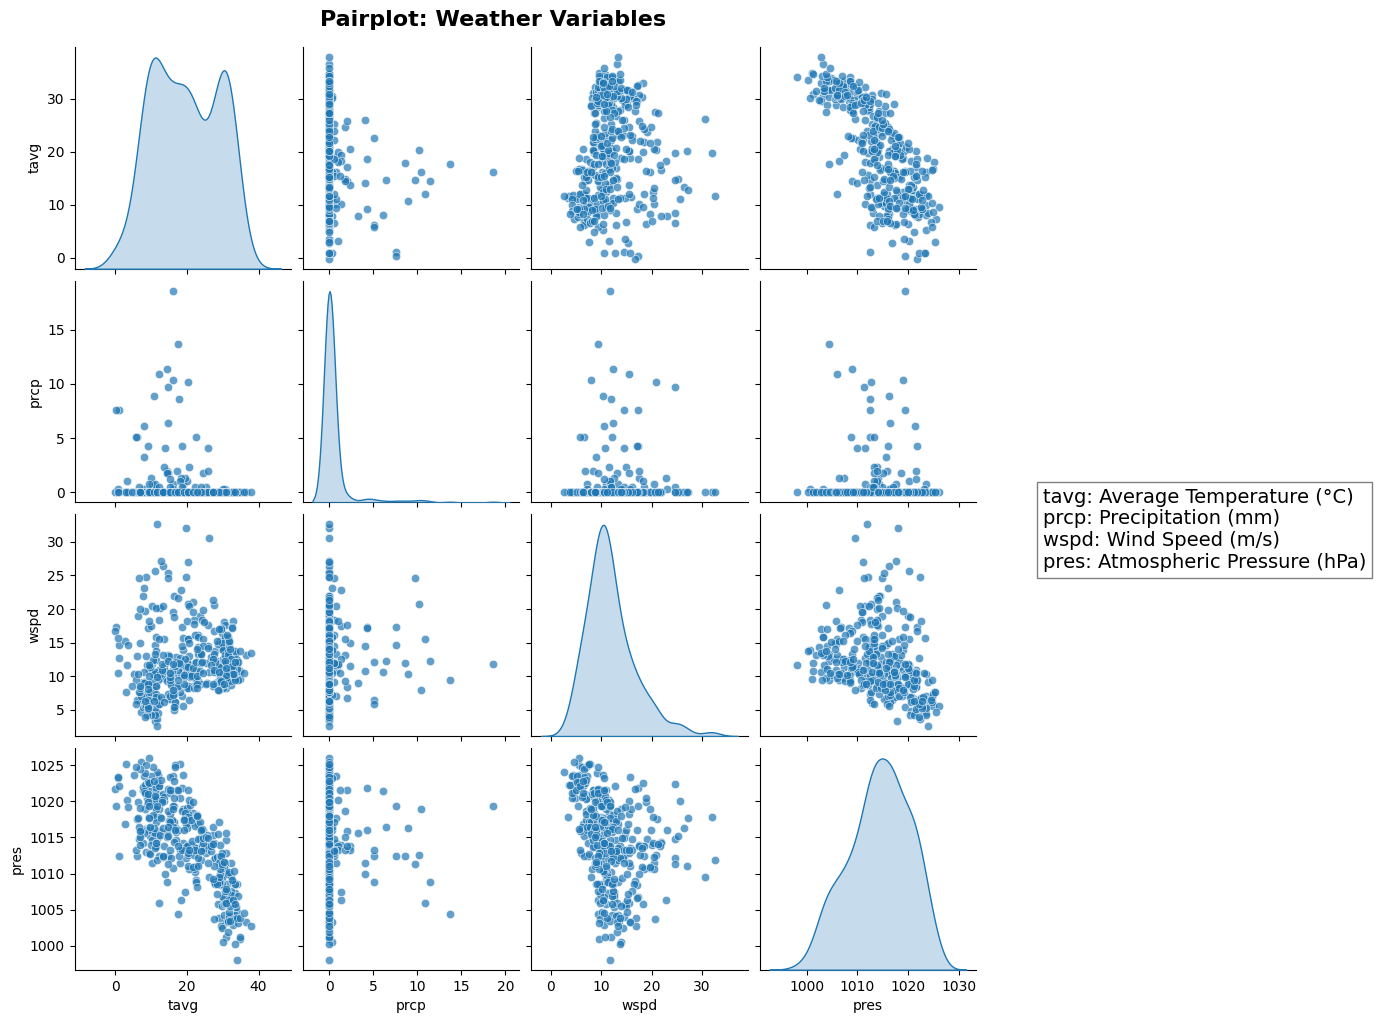

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = r'E:\CompAppTools\Project\TehranWeather.xlsx'
df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define seasonal date ranges
winter = (df['date'] >= '2023-12-21') & (df['date'] <= '2024-03-20')
spring = (df['date'] >= '2024-03-21') & (df['date'] <= '2024-06-20')
summer = (df['date'] >= '2024-06-21') & (df['date'] <= '2024-09-20')
fall = (df['date'] >= '2024-09-21') & (df['date'] <= '2024-12-20')

# Segment the dataset by seasons
seasons = {
    'Winter': df[winter]['tavg'],
    'Spring': df[spring]['tavg'],
    'Summer': df[summer]['tavg'],
    'Fall': df[fall]['tavg']
}

def plot_full_correlation_heatmap(data, output_folder=None):
    """
    Plot and save a heatmap of correlations for selected numerical columns.
    """
    # Focus only on specific columns
    columns_to_include = ['tavg', 'prcp', 'wspd', 'pres']
    numerical_data = data[columns_to_include]
    corr_matrix = numerical_data.corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    
    plt.title("Correlation Heatmap: Weather Variables", fontsize=16, fontweight="bold")
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Variables", fontsize=12)
    
    legend_labels = {
        'tavg': 'Average Temperature (°C)',
        'prcp': 'Precipitation (mm)',
        'wspd': 'Wind Speed (m/s)',
        'pres': 'Atmospheric Pressure (hPa)'
    }

    # Add legend box on the right
    legend_text = "\n".join(f"{k}: {v}" for k, v in legend_labels.items())
    plt.text(1.25, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    if output_folder:
        heatmap_path = f"{output_folder}/Filtered_Correlation_Heatmap.pdf"
        plt.savefig(heatmap_path, bbox_inches='tight')
        print(f"Filtered correlation heatmap saved at: {heatmap_path}")
    plt.show()

def plot_full_pairplot(data, output_folder=None):
    """
    Plot and save pairplots for selected numerical columns.
    """
    # Focus only on specific columns
    columns_to_include = ['tavg', 'prcp', 'wspd', 'pres']
    numerical_data = data[columns_to_include].dropna()

    pairplot = sns.pairplot(numerical_data, diag_kind="kde", plot_kws={"alpha": 0.7})
    pairplot.fig.suptitle("Pairplot: Weather Variables", y=1.02, fontsize=16, fontweight="bold")
    
    legend_labels = {
        'tavg': 'Average Temperature (°C)',
        'prcp': 'Precipitation (mm)',
        'wspd': 'Wind Speed (m/s)',
        'pres': 'Atmospheric Pressure (hPa)'
    }

    # Add legend box on the right
    legend_text = "\n".join(f"{k}: {v}" for k, v in legend_labels.items())
    pairplot.fig.text(1.05, 0.5, legend_text, fontsize=14, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    
    if output_folder:
        pairplot_path = f"{output_folder}/Filtered_Pairplot.pdf"
        pairplot.savefig(pairplot_path)
        print(f"Filtered pairplot saved at: {pairplot_path}")
    plt.show()

# Plot the heatmap and pairplot
output_folder = None
plot_full_correlation_heatmap(df, output_folder=output_folder)
plot_full_pairplot(df, output_folder=output_folder)



**Discussion**

The analysis of Tehran’s weather data for one year has provided meaningful insights into the city’s climatic patterns and extreme weather events. By employing statistical techniques—such as summary statistics, correlation analysis, and outlier detection—combined with advanced visualization methods, the study successfully identified key trends and anomalies in temperature and precipitation.
The findings revealed distinct seasonal characteristics of Tehran’s climate. For instance, July was identified as the warmest month, while February was the coldest. These seasonal variations were further validated through the analysis of temperature trends, which highlighted pronounced deviations during these extreme months. Correlation analysis uncovered minimal linear relationships between average temperature and precipitation, supporting the hypothesis that these variables are weakly correlated. Furthermore, the removal of outliers improved the dataset’s reliability, resulting in cleaner and more accurate distributions for analysis.
However, the study faced limitations. Significant gaps in data, particularly for variables like wind gust and sunshine duration, restricted the scope of the investigation. These limitations highlight the need for future studies to integrate additional data sources to address missing information and enable a more comprehensive analysis of Tehran’s climatic dynamics.

**Conclusion**

This project demonstrates the value of statistical and visualization techniques in climate research. Through the analysis of Tehran’s weather patterns, it has provided critical insights into seasonal trends and extreme events. The identification of outliers and anomalies contributes to a better understanding of climatic variability, offering valuable information for decision-makers to prepare for and mitigate the impacts of extreme weather events.
Overall, the findings not only enhance the understanding of Tehran’s weather but also establish a strong foundation for future research aimed at exploring its climate more comprehensively.

